<a href="https://colab.research.google.com/github/surizar2/Statistical-Learning/blob/main/Lab1/Laboratorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1
## Statistical Learning 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

In [6]:
### Carga de datos
df = pd.read_csv('/FuelConsumptionCo2.csv')

In [7]:
### exploracion
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
### se seleccionan variables de interés y se ve una muestra de sus valores

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(n = 10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
291,3.6,6,12.0,276
766,5.5,8,15.5,356
976,1.8,4,6.8,156
214,5.3,8,21.5,344
278,3.6,6,14.4,230
483,2.4,4,8.7,200
655,1.8,4,5.6,129
375,3.7,6,12.3,283
113,3.0,6,8.3,191
2,1.5,4,5.9,136


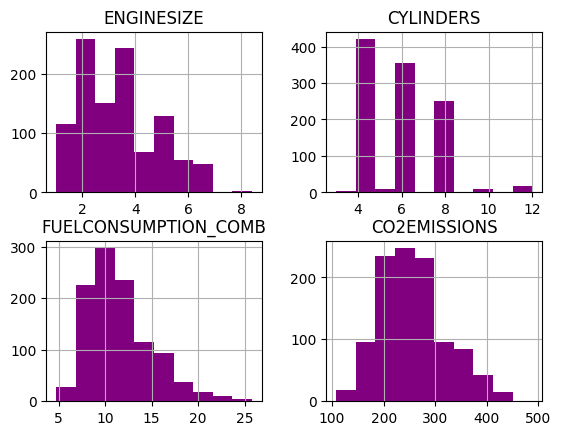

In [20]:
## histogramas
cdf.hist(color = 'purple')
plt.show()

## Práctica

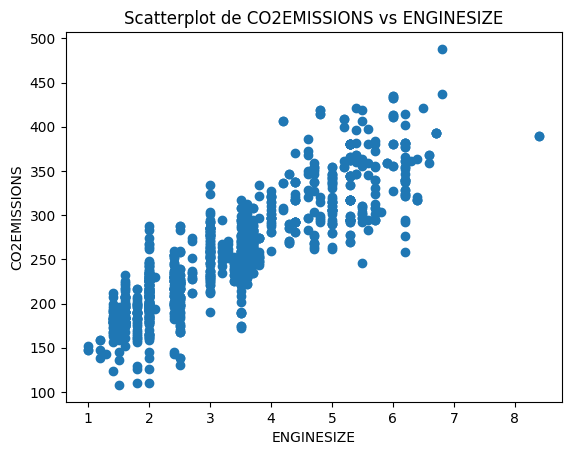

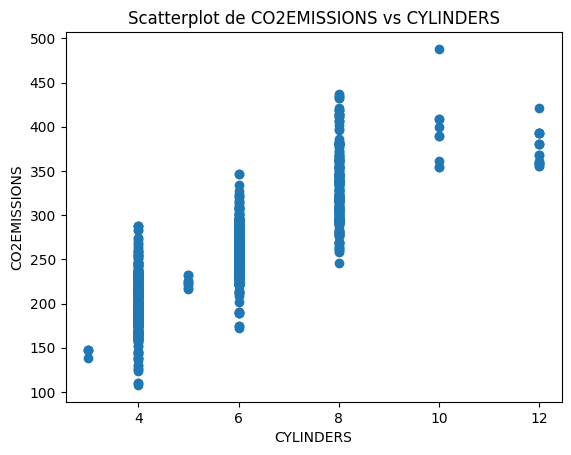

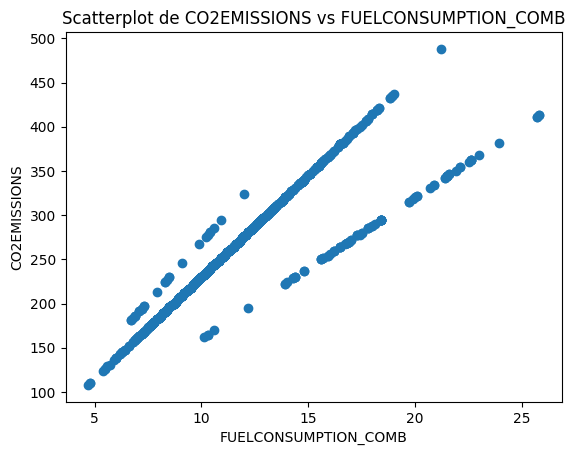

In [21]:
## Scatterplots
for variable in cdf:
  if variable != 'CO2EMISSIONS':
    plt.figure()
    plt.title(f'Scatterplot de CO2EMISSIONS vs {variable}')
    plt.xlabel(variable)
    plt.ylabel('CO2EMISSIONS')
    plt.scatter(cdf[variable],cdf['CO2EMISSIONS'])

### Creando set de entrenamiento y prueba

In [26]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Generando modelos de regresión

In [54]:
from sklearn import linear_model
vari1 = linear_model.LinearRegression()
vari2 = linear_model.LinearRegression()
vari3 = linear_model.LinearRegression()
train_x1 = np.array(train[['ENGINESIZE']])
train_x2 = np.array(train[['CYLINDERS']])
train_x3 = np.array(train[['FUELCONSUMPTION_COMB']])
train_y = np.array(train[['CO2EMISSIONS']])


In [55]:
var1 = vari1.fit(train_x1,train_y)
print(f'Coeficiente para Engine Size: {var1.coef_}')
print(f'intercepto para Engine Size: {var1.intercept_}')

Coeficiente para Engine Size: [[39.5057153]]
intercepto para Engine Size: [124.07973403]


In [56]:
var2 = vari2.fit(train_x2,train_y)
print(f'Coeficiente para cilindraje: {var2.coef_}')
print(f'intercepto para cilindraje: {var2.intercept_}')


Coeficiente para cilindraje: [[29.94292137]]
intercepto para cilindraje: [82.72494421]


In [57]:
var3 = vari3.fit(train_x3,train_y)
print(f'Coeficiente para consumo combinado: {var3.coef_}')
print(f'intercepto para consumo combinado: {var3.intercept_}')

Coeficiente para consumo combinado: [[16.01992989]]
intercepto para consumo combinado: [70.93327585]


### Gráficas de los modelos obtenidos

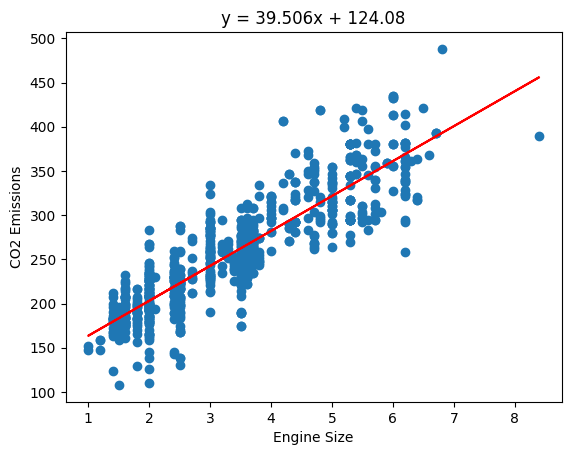

In [68]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.plot(train_x1,var1.coef_[0][0]*train_x1 + var1.intercept_,'-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title(f'y = {round(var1.coef_[0][0],3)}x + {round(var1.intercept_[0],3)}')
plt.show()

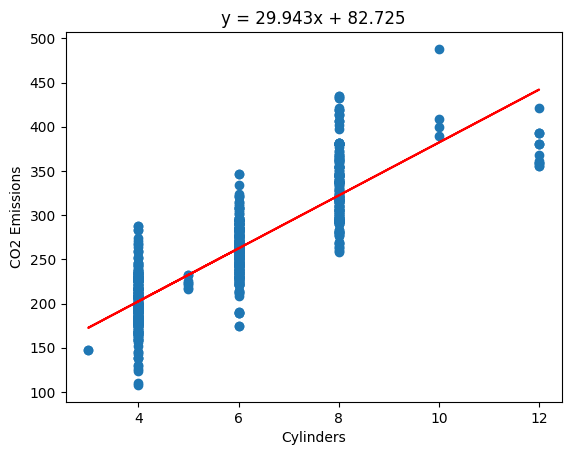

In [66]:
plt.scatter(train.CYLINDERS,train.CO2EMISSIONS)
plt.plot(train_x2,var2.coef_[0][0]*train_x2 + var2.intercept_,'-r')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.title(f'y = {round(var2.coef_[0][0],3)}x + {round(var2.intercept_[0],3)}')
plt.show()

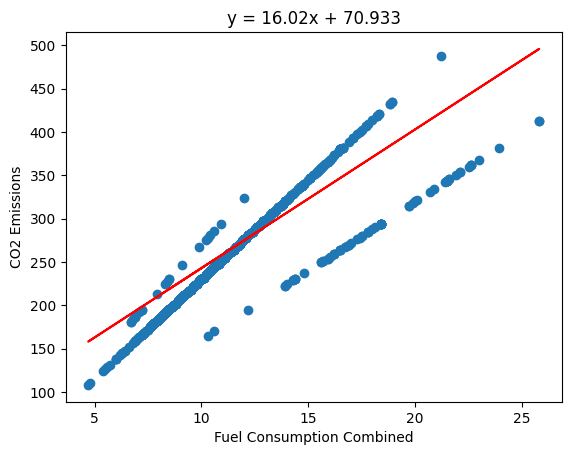

In [67]:
plt.scatter(train.FUELCONSUMPTION_COMB,train.CO2EMISSIONS)
plt.plot(train_x3,var3.coef_[0][0]*train_x3 + var2.intercept_,'-r')
plt.xlabel('Fuel Consumption Combined')
plt.ylabel('CO2 Emissions')
plt.title(f'y = {round(var3.coef_[0][0],3)}x + {round(var3.intercept_[0],3)}')
plt.show()

### Verificando Error

In [69]:
from sklearn.metrics import r2_score

test_y = np.array(cdf[['CO2EMISSIONS']])
test_x1 = np.array(cdf[['ENGINESIZE']])
test_x2 = np.array(cdf[['CYLINDERS']])
test_x3 = np.array(cdf[['FUELCONSUMPTION_COMB']])
test_y1 = vari1.predict(test_x1)
test_y2 = vari2.predict(test_x2)
test_y3 = vari3.predict(test_x3)




In [75]:
print(f'Error absoluto para Engine Size: {round(np.mean(np.absolute(test_y-test_y1)),3)}')
print(f'Érror cuadrático medio para Engine Size: {round(np.mean((test_y-test_y1)**2),3)}')
print(f'R2 score: {round(r2_score(test_y,test_y1),3)}')

Error absoluto para Engine Size: 23.351
Érror cuadrático medio para Engine Size: 946.606
R2 score: 0.764


In [76]:
print(f'Error absoluto para cilindraje: {round(np.mean(np.absolute(test_y-test_y2)),3)}')
print(f'Érror cuadrático medio para cilindraje: {round(np.mean((test_y-test_y2)**2),3)}')
print(f'R2 score: {round(r2_score(test_y,test_y2),3)}')

Error absoluto para cilindraje: 25.717
Érror cuadrático medio para cilindraje: 1115.561
R2 score: 0.722


In [77]:
print(f'Error absoluto para Consumo combinado: {round(np.mean(np.absolute(test_y-test_y3)),3)}')
print(f'Érror cuadrático medio para consumo combinado: {round(np.mean((test_y-test_y3)**2),3)}')
print(f'R2 score: {round(r2_score(test_y,test_y3),3)}')

Error absoluto para Consumo combinado: 20.575
Érror cuadrático medio para consumo combinado: 819.472
R2 score: 0.796
